<a href="https://colab.research.google.com/github/Ana-Jasso/Inmersi-nDeDatos/blob/main/Inmersi%C3%B3nDeDatos_SegundoDesaf%C3%ADo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 2 - Desafíos.**
- Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información);
- Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [61]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

inmuebles = pd.read_csv('/content/drive/MyDrive/InmersiónDeDatos/inmuebles_bogota.csv')

In [63]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.head(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000


- **Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información);**



In [64]:
print(inmuebles['Tipo'].value_counts())

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64


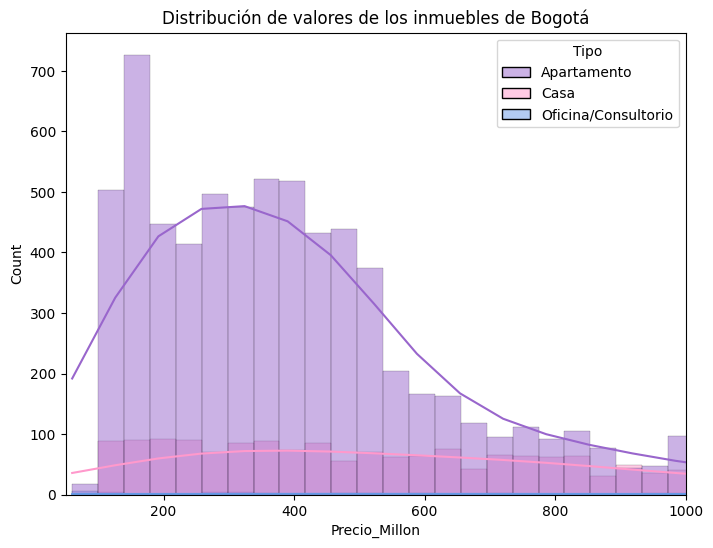

In [93]:
plt.figure(figsize=(8,6))
tipos_seleccionados = ["Casa", "Apartamento", "Oficina/Consultorio"]

# Filtra el DataFrame para incluir solo los tipos seleccionados
inmuebles_seleccionados = inmuebles[inmuebles['Tipo'].isin(tipos_seleccionados)]
grafica = sns.histplot(data=inmuebles_seleccionados, x='Precio_Millon', kde=True, hue='Tipo')
colores_personalizados = [(0.6, 0.4, 0.8), (1.0, 0.6, 0.8), (1.0, 0.8, 0.9), (0.4, 0.6, 0.9), (0.7, 0.9, 1.0)]
sns.set_palette(colores_personalizados)
grafica.set_title('Distribución de valores de los inmuebles de Bogotá')
plt.xlim((50,1000))
plt.show()



*   **Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.**



In [66]:
inmuebles.Valor[:1]

0    $ 360.000.000
Name: Valor, dtype: object

In [67]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
4142,Casa,Casa en venta en Capellania,6,4,240,Capellania,Modelia,$ 880.000.000,$,880.000.000
7572,Apartamento,Apartamento en venta en Chico Reservado,2,3,130,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.000.000.000,$,1.000.000.000
2203,Apartamento,Apartamento en venta en Usaquén,3,1,39,Usaquén,Usaquén,$ 150.000.000,$,150.000.000


In [68]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','', regex=True)

In [69]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [70]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [71]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [72]:
inmuebles['Precio/m2'] = inmuebles["Precio_Millon"] / inmuebles["Area"]
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Precio/m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78


In [73]:
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio

<ipython-input-73-45bba8259daf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_barrio = inmuebles.groupby('Barrio').sum()


,Habitaciones,Banos,Area,Precio_Millon,Precio/m2
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


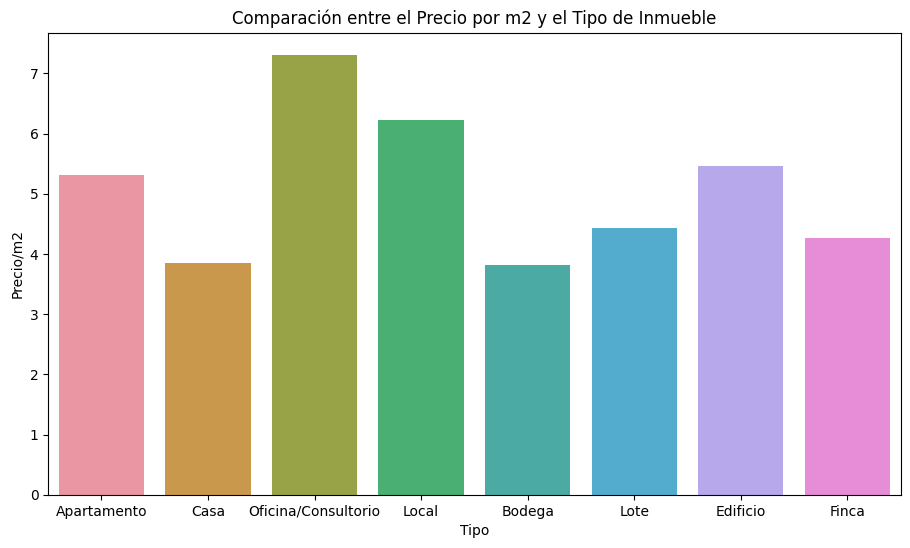

In [116]:
# Configura el tamaño del gráfico
plt.figure(figsize=(11, 6))

# Crea el gráfico de barras para comparar el Precio/m2 por tipo de inmueble
grafica = sns.barplot(data=inmuebles, x='Tipo', y='Precio/m2', errorbar=None)

# Configuración del título
grafica.set_title('Comparación entre el Precio por m2 y el Tipo de Inmueble')

# Muestra el gráfico
plt.show()